# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')
x = feature[:,0]
y = feature[:,1]
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

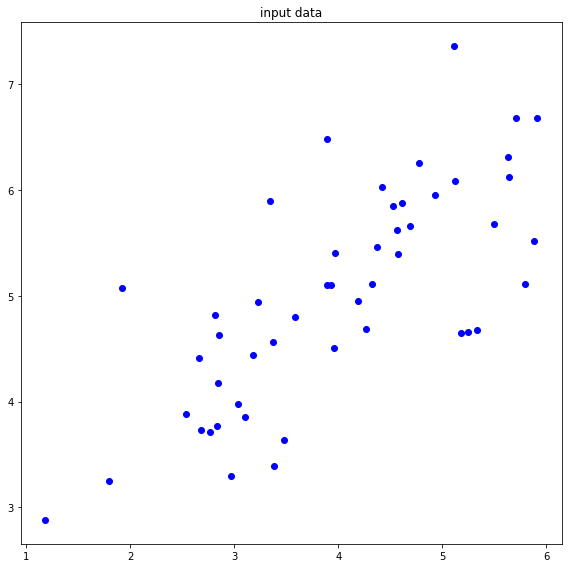

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')
# ===================================================
plt.scatter(x, y, color='blue')
# ===================================================
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x =  3.9892652
mean of y =  5.0028060000000005
std of x =  1.161260585149156
std of y =  1.0131222834742113


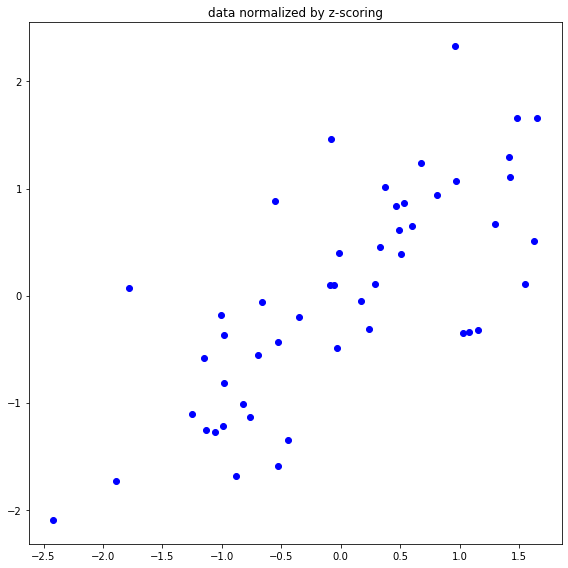

In [4]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
# ===================================================
x_mean = np.mean(x)
y_mean = np.mean(y)

x_std = np.std(x)
y_std = np.std(y)

print('mean of x = ', x_mean)
print('mean of y = ', y_mean)
print('std of x = ', x_std)
print('std of y = ', y_std)

x = np.divide((x - x_mean), x_std)
y = np.divide((y - y_mean), y_std)
feature = np.array([x, y]).T

plt.scatter(x, y, color='blue')
# ===================================================
plt.tight_layout()
plt.show()


def plot_norm(x, y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    # ===================================================
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_std = np.std(x)
    y_std = np.std(y)

    x = np.divide((x - x_mean), x_std)
    y = np.divide((y - y_mean), y_std)

    plt.scatter(x, y, color='blue')
    # ===================================================
    plt.tight_layout()
    plt.show()

## compute covariance matrix

In [5]:
def compute_covariance(feature):
    # ===================================================
    x = feature[:,0]
    y = feature[:,1]
    Z = np.array((x, y)).T
    ZT = Z.T
    Sigma = (1/number_data)*(ZT@Z)
    # ===================================================
    return Sigma

## compute principal directions

In [6]:
def compute_eigen(X):
    # eig_vector = U, eig_value = S ====================
    S, U = np.linalg.eig(X)
    # ===================================================
    return S, U

In [7]:
Sigma = compute_covariance(feature)
S, U = np.linalg.eig(Sigma)

# EigenValue
pd1 = S[0]
pd2 = S[1]

# EigenVector
eigvec1 = U[0]
eigvec2 = U[1]

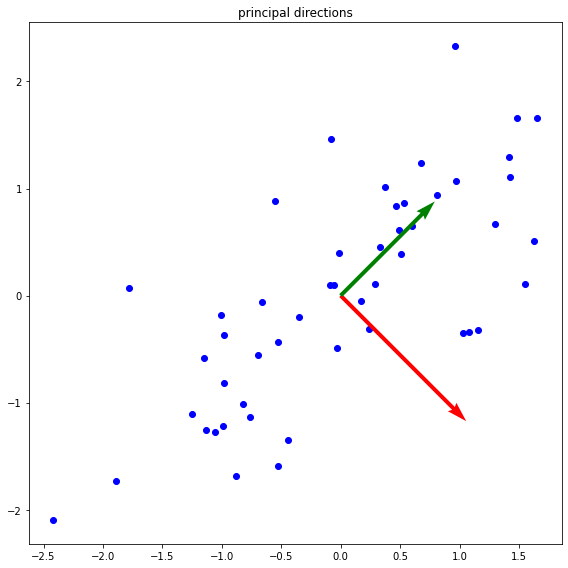

In [8]:
def principal_directions(x, y, eigvec1, eigvec2):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    # ===================================================
    origin = [0,0]
    plt.scatter(x, y, color='blue')
    plt.quiver(*origin, *eigvec1, color=['r'], scale=3)
    plt.quiver(*origin, *eigvec2, color=['g'], scale=4)
    # ===================================================
    plt.tight_layout()
    plt.show()

principal_directions(x, y, eigvec1, eigvec2)

## first principal axis

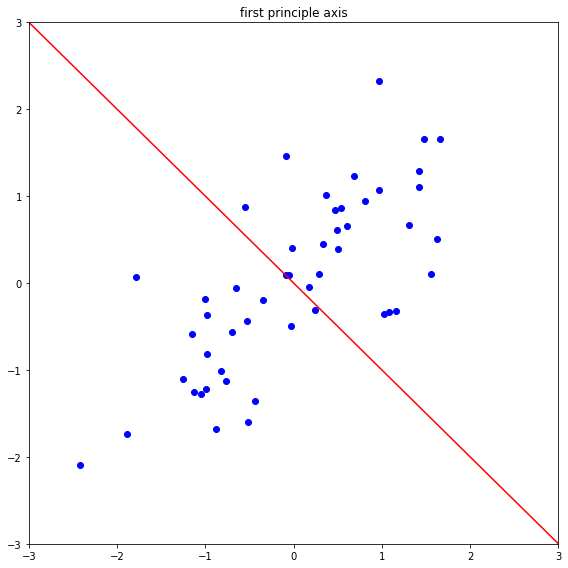

In [9]:
def plot_first(x, y, eigvec1):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    # ===================================================
    plt.scatter(x, y, color='blue')
    a = eigvec1[1]/eigvec1[0]
    xx = np.arange(-4, 4, 0.01)
    plt.plot(xx, a*xx, linestyle='-', color = 'red')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_first(x, y, eigvec1)

## second principal axis

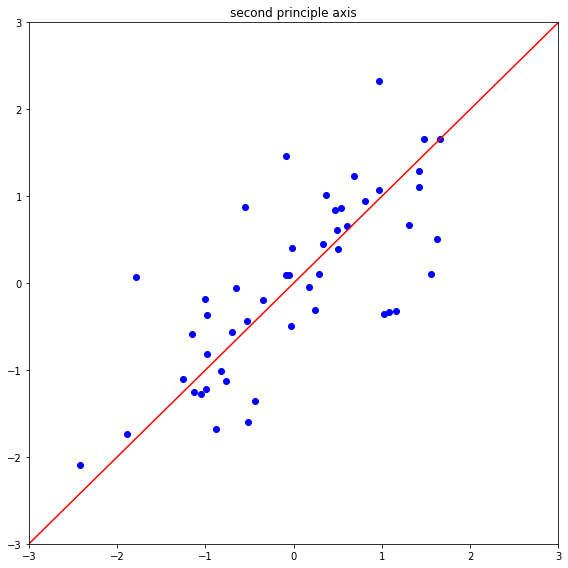

In [10]:
def plot_second(x, y, eigvec2):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    # ===================================================
    plt.scatter(x, y, color='blue')
    a = eigvec2[1]/eigvec2[0]
    xx = np.arange(-4, 4, 0.01)
    plt.plot(xx, a*xx, linestyle='-', color = 'red')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_second(x, y, eigvec2)

## compute the projection of point onto the line

In [11]:
def compute_projection_onto_line(feature, vector):
    # ===================================================
    projection = vector@feature.T
    # ===================================================
    return projection

## projcet to the first principal axis

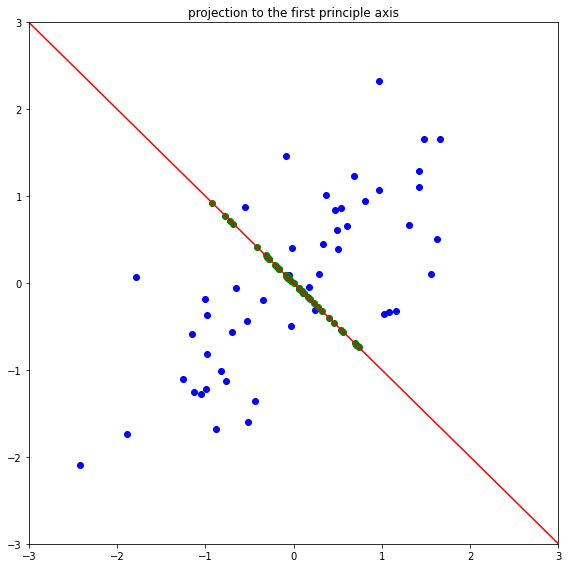

In [12]:
def plot_project_first(x, y, feature, eigvec1):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    # ===================================================
    plt.scatter(x, y, color='blue')
    a = eigvec1[1]/eigvec1[0]
    xx = np.arange(-4, 4, 0.01)
    plt.plot(xx, a*xx, linestyle='-', color = 'red')
    projection = compute_projection_onto_line(feature, eigvec1)
    for i in range(50):
        plt.scatter(projection[i]*eigvec1[0], projection[i]*eigvec1[1], color='green')
    
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    # ===================================================
    plt.tight_layout()
    plt.show()
    
plot_project_first(x, y, feature, eigvec1)

## projcet to the second principal axis

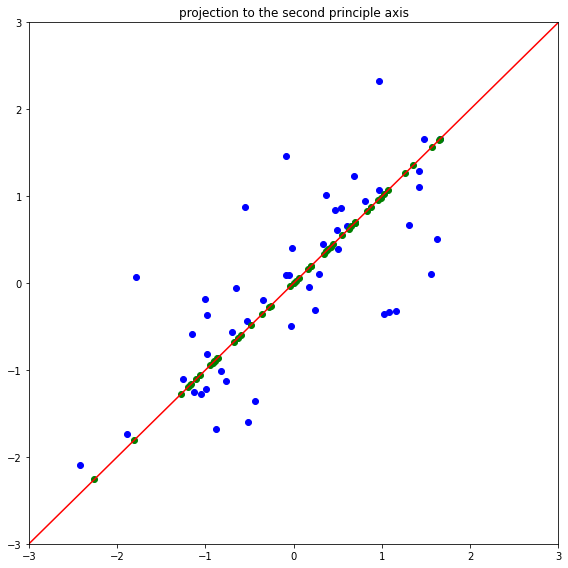

In [13]:
def plot_project_second(x, y, feature, eigvec2):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    # ===================================================
    
    plt.scatter(x, y, color='blue')
    a = eigvec2[1]/eigvec2[0]
    xx = np.arange(-4, 4, 0.01)
    plt.plot(xx, a*xx, linestyle='-', color = 'red')
    projection = compute_projection_onto_line(feature, eigvec2)
        
    for i in range(50):
        plt.scatter(projection[i]*eigvec2[0], projection[i]*eigvec2[1], color='green')
    
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    # ===================================================
    plt.tight_layout()
    plt.show()

plot_project_second(x, y, feature, eigvec2)

## connect original data to the projection onto the first principal axis

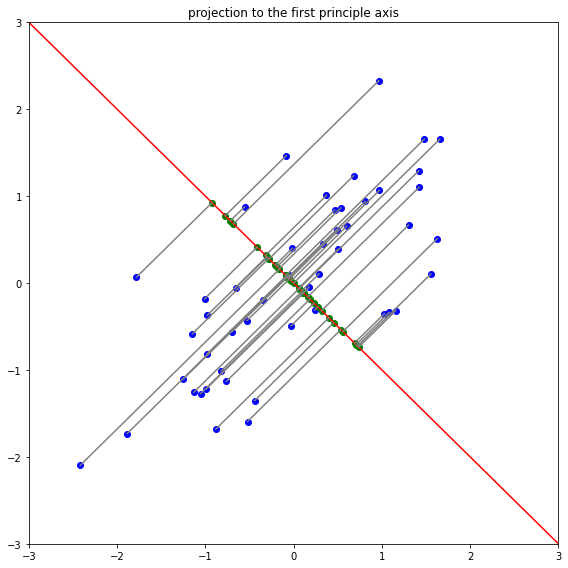

In [14]:
def plot_connection_first(x, y, feature, eigvec1):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    # ===================================================
    plt.scatter(x, y, color='blue')
    a = eigvec1[1]/eigvec1[0]
    xx = np.arange(-4, 4, 0.01)
    plt.plot(xx, a*xx, linestyle='-', color = 'red')
    projection = compute_projection_onto_line(feature, eigvec1)

    for i in range(50):
        plt.scatter(projection[i]*eigvec1[0], projection[i]*eigvec1[1], color='green')
        plt.plot([feature[i][0], projection[i]*eigvec1[0]], [feature[i][1], projection[i]*eigvec1[1]], color='grey')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    # ===================================================
    plt.tight_layout()
    plt.show()

plot_connection_first(x, y, feature, eigvec1)

## connect original data to the projection onto the second principal axis

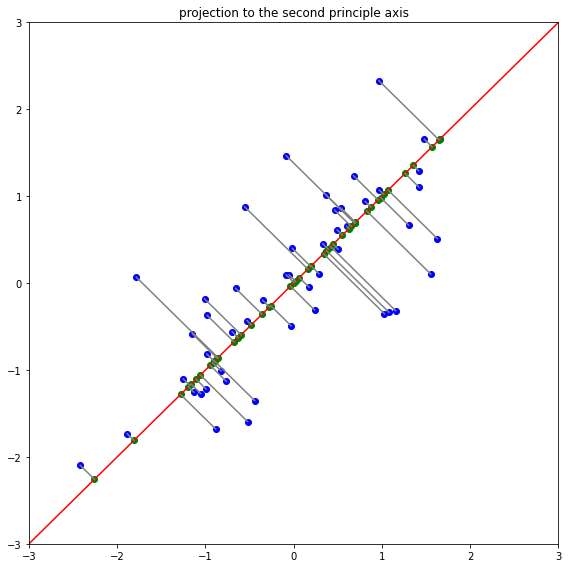

In [15]:
def plot_connection_second(x, y, feature, eigvec2):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    # ===================================================
    plt.scatter(x, y, color='blue')
    a = eigvec2[1]/eigvec2[0]
    xx = np.arange(-4, 4, 0.01)
    plt.plot(xx, a*xx, linestyle='-', color = 'red')
    projection = compute_projection_onto_line(feature, eigvec2)
        
    for i in range(50):
        plt.scatter(projection[i]*eigvec2[0], projection[i]*eigvec2[1], color='green')
        plt.plot([feature[i][0], projection[i]*eigvec2[0]], [feature[i][1], projection[i]*eigvec2[1]], color='grey')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    # ===================================================
    plt.tight_layout()
    plt.show()

plot_connection_second(x, y, feature, eigvec2)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

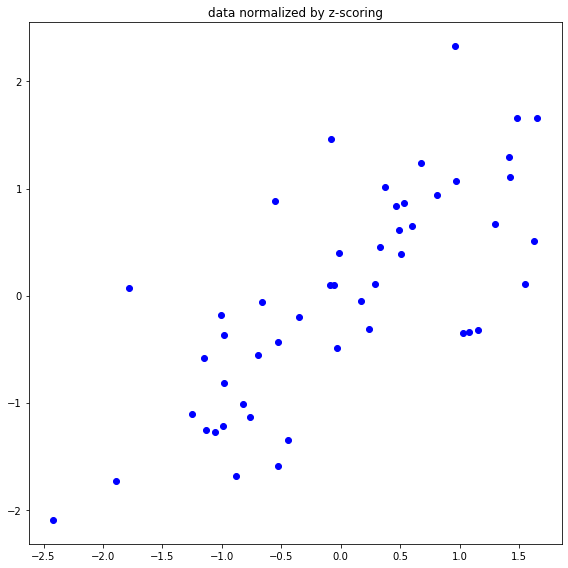

In [16]:
plot_norm(x, y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

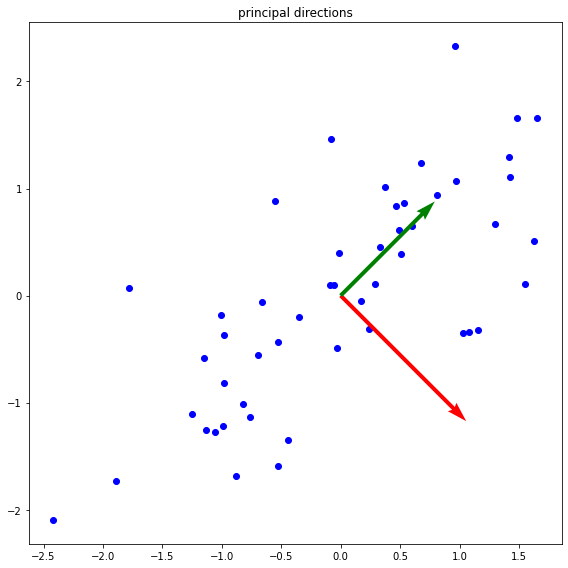

In [17]:
principal_directions(x, y, eigvec1, eigvec2)

***

### 3. plot the first principal axis in red on the normalized data in blue

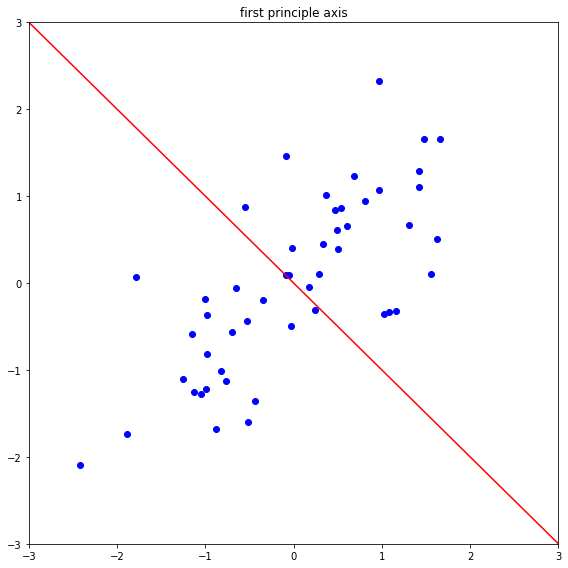

In [18]:
plot_first(x, y, eigvec1)

***

### 4. plot the second principal axis in red on the normalized data in blue

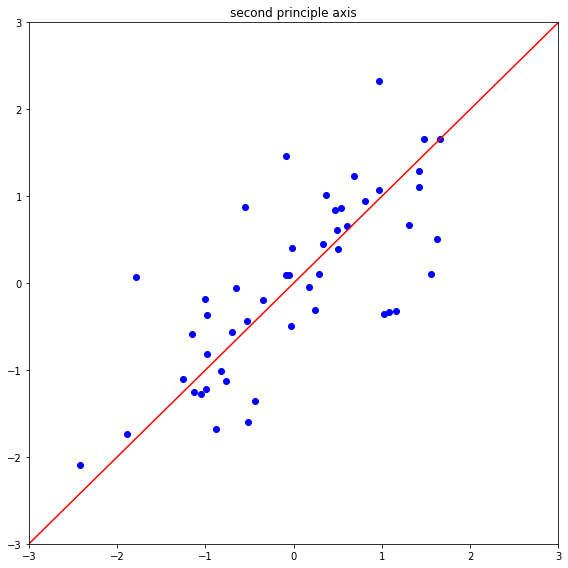

In [19]:
plot_second(x, y, eigvec2)

***

### 5. plot the projection of data in green onto the first principal axis in red

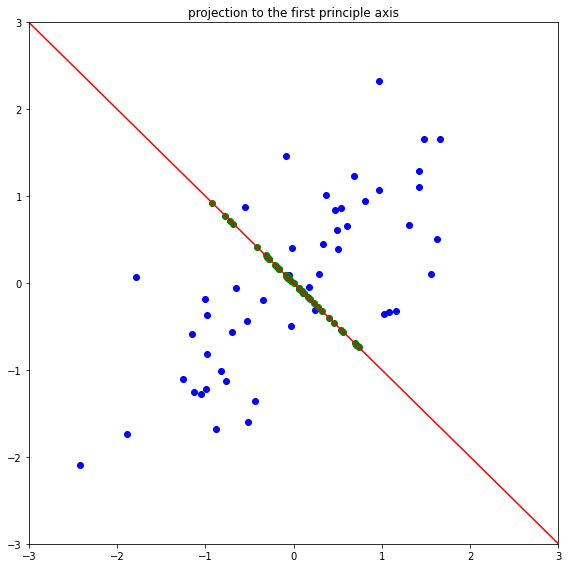

In [20]:
plot_project_first(x, y, feature, eigvec1)

***

### 6. plot the projection of data in green onto the second principal axis in red

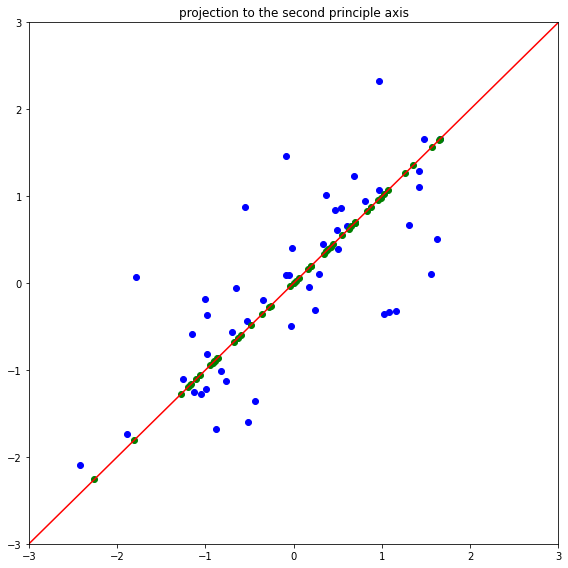

In [21]:
plot_project_second(x, y, feature, eigvec2)

***

### 7. plot the projection line in grey onto the first principal axis

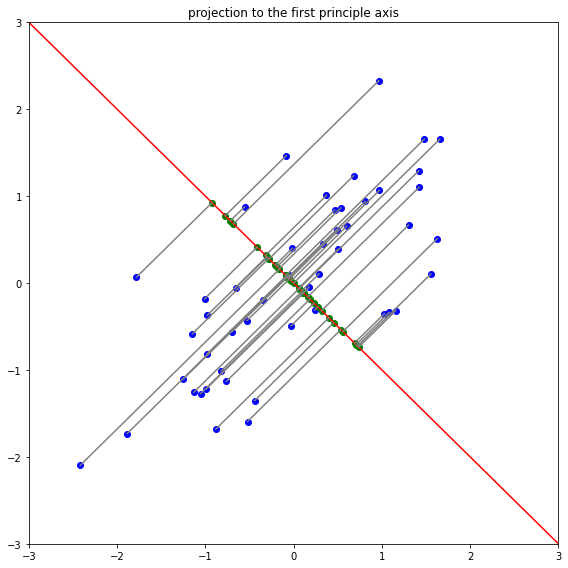

In [22]:
plot_connection_first(x, y, feature, eigvec1)

***

### 8. plot the projection line in grey onto the second principal axis

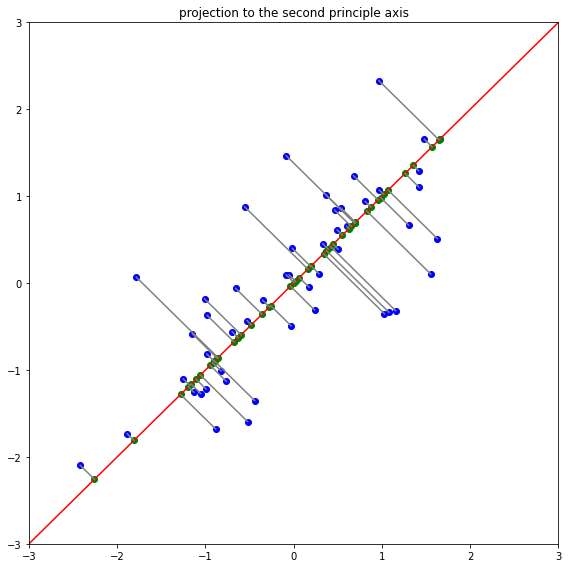

In [23]:
plot_connection_second(x, y, feature, eigvec2)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***